# Spring 2020 CS 498 DSU
## MP1: Autonomous Vehicles
#### Authors: Samuel Chyu (Schyu2), Andro Manukov (Manukov2), First Last (NetID)

## Task 0 

### 1) Import Dataset into Jupyter Notebook

In [1]:
import pandas as pd #importing pandas

In [2]:
totalmiles_df = pd.read_csv("mp1_av_totalmiles.csv") #importing the dataset

In [39]:
totalmiles_df.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,Disengagements/Mile
0,2014-09-01,WDD2221851A001072,4207,44,24,20,0.010459
1,2014-10-01,WDD2221851A001072,23971,228,100,128,0.009511
2,2014-11-01,WDD2221851A001072,15837,141,66,75,0.008903
3,2014-12-01,WDD2221851A001072,9413,36,15,21,0.003824
4,2015-01-01,WDD2221851A001072,18192,48,18,30,0.002639


In [4]:
disengagements_df = pd.read_csv("mp1_av_disengagements.csv")

In [5]:
disengagements_df.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


### 2) Summarize Information

#### A) Total number of AV disengagements over the entire duration of available data

In [6]:
len(disengagements_df) #the length of the data is the total number of disengagnemtns.

1024

#### B) Number of unique months that have recorded AV disengagements


In [7]:
len(list(disengagements_df.Month.unique())) #The length of the list of unique months is the answer. Unique produces a list of unique values in the passed set. Length is needed so that the result is not the unique months but the count of unique months. 

15

#### C) List of unique locations of AV disengagements


In [8]:
list(disengagements_df.Location.unique()) #Unique produces the unique values of the passed set.

['urban-street', 'highway']

#### D) Number of unique causes for AV disengagements


In [9]:
len(list(disengagements_df.Cause.unique())) #similar to part b, but now passing the column cause.

10

#### E) Which columns in the datasets (if any) have missing values? How many missing values do these column(s) have? (NAs (not valid entries) commonly occur in real world datasets…)

In [10]:
disengagements_df.isnull().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
dtype: int64

### 3) Plot a pie chart for the causes of AV disengagement. Based on the pie-chart, list the top 2 leading causes of disengagement?

In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = disengagements_df['Cause'].value_counts()
patches, texts, _ = plt.pie(causes, 
        labels=causes.keys(),
        autopct='%.1f%%', shadow=True)
plt.title("Pie Chart for the Causes of AV Disengagement")
plt.show()

<Figure size 1200x800 with 1 Axes>

The number 1 cause of disengagement is "Unwanted Driver Discomfort" at 12.5% <br/>
The number 2 cause of disengagementt is "Recklessly behaving agent" at 12.1%

### 4) Visualize the trend of disengagement/mile over time with monthly granularity. How would you describe the trend? Are AV’s maturing over time?

In [12]:
totalmiles_df["Disengagements/Mile"] =  totalmiles_df["total number of disengagements"] / totalmiles_df["miles driven in autonomous mode"]  #data manipulation and column creation to get the desired data.

In [13]:
totalmiles_df.head() # self review for ensuring the desired column is made.

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements,Disengagements/Mile
0,14-Sep,WDD2221851A001072,4207,44,24,20,0.010459
1,14-Oct,WDD2221851A001072,23971,228,100,128,0.009511
2,14-Nov,WDD2221851A001072,15837,141,66,75,0.008903
3,14-Dec,WDD2221851A001072,9413,36,15,21,0.003824
4,15-Jan,WDD2221851A001072,18192,48,18,30,0.002639


In [14]:
from datetime import datetime #importing everything for the future plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats as st
from statsmodels.stats import weightstats as stests

In [15]:
totalmiles_df["Month"] = pd.to_datetime(totalmiles_df["Month"], format='%y-%b') # cleaning the month column so that that the x values will be in order.

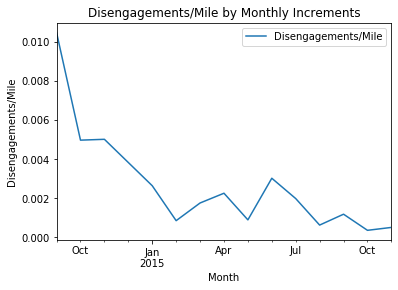

In [16]:
#plotting and assigning labels.
dis_mile_plot = totalmiles_df.groupby('Month')['Disengagements/Mile'].mean().dropna().plot()
dis_mile_plot.set_title("Disengagements/Mile by Monthly Increments")
dis_mile_plot.set_ylabel("Disengagements/Mile")
dis_mile_plot.set_xlabel("Month")
plt.legend()
plt.show()

This trend is generally curving downwards, as time progresses. This indicates that generally, AV software has been maturing, as there are less disengagements per mile.

## Task 1

### 1) What do the following distributions signify about samples drawn from it 

#### A) Gaussian distribution

#### B) Exponential distribution

#### C) Weibull distribution

### 2) Plot the probability distribution of reaction times. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?


Text(0, 0.5, 'Normalized Counts')

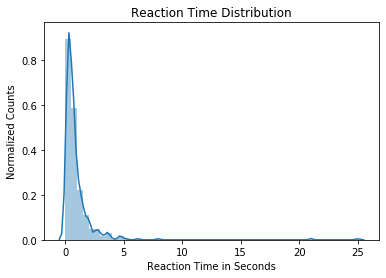

In [17]:
ax = sns.distplot(disengagements_df['ReactionTime'].dropna())
ax.set_title("Reaction Time Distribution")
ax.set_xlabel("Reaction Time in Seconds")
ax.set_ylabel("Normalized Counts")

### 3) Compute the average reaction time

#### A) For the entire duration of the dataset

In [18]:
disengagements_df['ReactionTime'].dropna().mean()#mean() returns the mean of the passed set.

0.9297703252032526

#### B) For the entire duration of the dataset differentiated by the location of disengagement

In [19]:
disengagements_df.dropna().groupby('Location')['ReactionTime'].mean() #groupby() returns subsets filtered by unique values. mean() then returns the mean values for the two subsets.

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64

### 4) It is known that the mean reaction time for humans in non-AV cars is 1.09 seconds. Is the mean reaction time for humans in AV cars different from non-AV cars? Perform a hypothesis testing at a 0.05 significance level. 

In [20]:
#applying the central limit theorum
z = stests.ztest(disengagements_df['ReactionTime'].dropna(), value = 1.09)[0]
pval = stests.ztest(disengagements_df['ReactionTime'].dropna(), value = 1.09)[1]
print(z)
print(pval)
print("Using the ztest function in the stats package, it can be seen that the z is -2.0986037086235854, and the pval associated with it is 0.03585184917192886. This is less than the 0.05 significance level so we reject the null hypothesis, and the reaction times for humans and AV cars are statistically different.")

-2.0986037086235854
0.03585184917192886
Using the ztest function in the stats package, it can be seen that the z is -2.0986037086235854, and the pval associated with it is 0.03585184917192886. This is less than the 0.05 significance level so we reject the null hypothesis, and the reaction times for humans and AV cars are statistically different.


### 5)  Plot the probability distribution of disengagements/mile with monthly granularity. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the distribution that fits signify?


This distribution looks roughly exponential indicating that, each month, the average disengagements/mile tends to be shorter rather than longer.


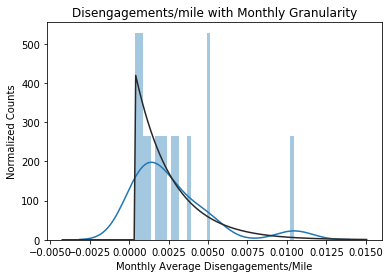

In [21]:
#plotting the disengagemtns/mile after being grouped by month.
dis_per_month = sns.distplot(totalmiles_df.dropna().groupby('Month')['Disengagements/Mile'].mean(), fit = st.expon, bins = 40, kde = True)
dis_per_month.set_ylabel("Normalized Counts")
dis_per_month.set_xlabel("Monthly Average Disengagements/Mile")
dis_per_month.set_title("Disengagements/mile with Monthly Granularity")
print('This distribution looks roughly exponential indicating that, each month, the average disengagements/mile tends to be shorter rather than longer.')

## Task 2

#### Assumptions
1. There can be at most one disengagement in a mile
2. A day can be either clear or cloudy, but not both. The probability of a day being clear in California is 72% [5].
3. The AV is equally likely to drive on a cloudy day as on a clear day. 

### 1) Based on the above assumptions, answer the following questions on basic probability.

##### A) The assumption on maximum number of disengagements in a mile allows us totreat the occurrence of a disengagement in a mile as a random variable with a BERNOULLI distribution.

#### B) Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day.  


In [22]:
prob_dpm = totalmiles_df["total number of disengagements"].sum() / totalmiles_df["miles driven in autonomous mode"].sum()

prob_cloudy = .28 #1 - .72

cloudy_weather = disengagements_df["Weather"] == "cloudy"

prob_dpm_given_cloudy = prob_dpm * (sum(cloudy_weather) / len(disengagements_df)) / prob_cloudy
prob_dpm_given_cloudy

0.00590255677552725

#### C) Based on the above assumptions, calculate the probability of disengagement per mile on a clear day

In [23]:
prob_clear = .72

clear_weather = disengagements_df["Weather"] == "clear"

prob_dpm_given_clear = prob_dpm * (sum(clear_weather) / len(disengagements_df)) / prob_clear
prob_dpm_given_clear

0.0005195663748517999

#### D) Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day.

In [24]:
automatic_trigger = disengagements_df["TypeOfTrigger"] == "automatic"

prob_dpm_automatic_given_cloudy = prob_dpm * (sum(cloudy_weather & automatic_trigger) / len(disengagements_df)) / prob_cloudy
prob_dpm_automatic_given_clear = prob_dpm * (sum(clear_weather & automatic_trigger) / len(disengagements_df)) / prob_clear
print("Probability of an automatic disengagement per mile on a cloudy day is: " + str(prob_dpm_automatic_given_cloudy))
print("Probability of an automatic disengagement per mile on a clear day is: " + str(prob_dpm_automatic_given_clear))


Probability of an automatic disengagement per mile on a cloudy day is: 0.0028063653172267287
Probability of an automatic disengagement per mile on a clear day is: 0.00026390673008345393


#### E) How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions? [Hint: Think of an appropriate approximation that makes the computation feasible/easier.]

In [25]:
print("The probability that there are more than 150 disengagemnts under cloudy conditions in 12000 miltes is {}.".format(1-st.binom.cdf(150, 12000, prob_dpm_given_cloudy)
))

The probability that there are more than 150 disengagemnts under cloudy conditions in 12000 miltes is 1.1102230246251565e-16.


### 2) Answer the following question about hypothesis testing:

#### A) What does the normal distribution represent in the hypothesis testing?

The normal distribution represents the distribution of a random variable under an assumption represented by the null hypothesis.

#### B) Does rejecting the null hypothesis mean accepting the alternative hypothesis? Explain your answer.

No, never. Rejecting the null hypothesis just means there is statistically significant evidence that goes against the null, not necessarily that there is enough evidence to support the alternative hypothesis.  


### 3) At a 0.05 significance level, test the following hypothesis: The AV has more disengagements (automatic and manual) on cloudy days than clear days. Based on the result of the hypothesis test, what can you conclude about the impact of weather conditions on AV safety? [Hint: Use a Z-test for testing this hypothesis].


In [37]:
1 - st.norm.cdf(z)

0.0

In [35]:
#calculating z of 2 prop z-test
cloudyn = sum(cloudy_weather)
clearn = sum(clear_weather)
overallp = prob_dpm
n_cloudy = prob_cloudy * totalmiles_df["miles driven in autonomous mode"].sum()
n_clear = prob_clear * totalmiles_df["miles driven in autonomous mode"].sum()
z = (prob_dpm_given_cloudy - prob_dpm_given_clear)/((overallp*(1-overallp)*((1/n_cloudy) + (1/n_clear))))**0.5
print( 'The pvalue of cloudy days having more disengagemnts than clear days is {}. therefore, under the 0.05 significance level we reject the null hypothesis, and there is statistical difference between the proportions of disengagements.'.format((1 - st.norm.cdf(z, loc=0, scale =1))))

The pvalue of cloudy days having more disengagemnts than clear days is 0.0. therefore, under the 0.05 significance level we reject the null hypothesis, and there is statistical difference between the proportions of disengagements.


 ### 4) What’s the conditional probability that the reaction time is: (Hint, there might be multiple conditions to consider.)

#### a)Greater than 0.6s given that the weather was cloudy? Reaction time is measured only in cases where there was an automatic disengagement

In [27]:
cloudy_weather = disengagements_df["Weather"] == "cloudy"
automatic_trigger = disengagements_df["TypeOfTrigger"] == "automatic"
goal_time = disengagements_df["ReactionTime"] > 0.6
pgoalcloudy = sum(goal_time & cloudy_weather & automatic_trigger)/sum(cloudy_weather & automatic_trigger)
print(pgoalcloudy)


0.473551637279597


#### b) Greater than 0.9s given the weather was clear? Reaction time is measured only in cases where there was an automatic disengagement.

In [28]:
clear_weather = disengagements_df["Weather"] == "clear"
automatic_trigger = disengagements_df["TypeOfTrigger"] == "automatic"
goal_time = disengagements_df["ReactionTime"] > 0.9
pgoalclear = sum(goal_time & clear_weather & automatic_trigger)/sum(clear_weather & automatic_trigger)
print(pgoalclear)


0.28125


### 5. A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.6s under cloudy conditions and, (ii) a reaction time greater than 0.9s under clear conditions. Find the probability of an accident per mile involving an AV disengagement. [Hint: Use the theorem of total probability to express the probability of an accident per mile as a sum of the conditional probabilities calculated in the previous questions in this task].

In [ ]:
#P(accident per mile involving Av) = p()

In [29]:
#P(slow) = p(slow|cloudy)p(cloudy)+p(slow|clear)p(clear)
pslow = pgoalclear * 0.72 + pgoalcloudy * 0.28
#p(accident per mile involving Av) = (p(slow) * n(disengagemtns))/n(miles) = n(accidents)/n(miles)
print((pslow * len(disengagements_df))/(totalmiles_df["miles driven in autonomous mode"].sum()))

0.0006791706838697026


### 6. The probability of a human driver causing a car accident is 2x10^-6. How do AV's compare to human drivers? Justify your conlcusion and explain its consequences.

Because the proababilty of a AV/driver system causing an accdient is about 6x10^-4, it is worse than the proabability of a human driver causing a car accident. This is because under the AV/driver system 300 times worse than the proabability of a human driver causing a car accident. This even gives the  claim against the use of current AV's since the addition of an AV system to a car makes human driver performance worse.

### 7. The hypothesis test you performed in this task is an example of a parametric test that assumes that the observed data is distributed similarly to some other well-known distribution (such as a normal distribution). However, sometimes, we need to compare two distributions of data that don’t follow any such well-known distributions. Perform a two-sample Kolmogorov-Smirnov test (using the ks_2samp package from Scipy) to compare the following two distributions: (1) distribution of disengagement reaction time when the weather is cloudy and (2) distribution of disengagement reaction time when the weather is clear. What are your null and alternative hypotheses? Assuming a significance level threshold of 0.1, what can you conclude from the test results about the impact of weather conditions on disengagement reaction time?

In [30]:
st.ks_2samp(disengagements_df[disengagements_df['Weather'] == 'cloudy']['ReactionTime'],disengagements_df[disengagements_df['Weather'] == 'clear']['ReactionTime'] )

Ks_2sampResult(statistic=0.05633178088267909, pvalue=0.6872561980283936)

The null hypothesis is that the two distributions are the same. 
The alternate hypothesis is that the two distributions are differnt.


At a 0.1 significance threshold, I fail to reject the null hypothesis, since the pvalue is 0.68, concluding that based on our data, the two sample distributions are from the same population distribution.

## Task 3

### 1. Though there are 10 different causes for disengagement, they can be grouped into the following 3 classes – (i) Controller, (ii) Perception System, and (iii) Computer System. The mapping from Disengagement Cause to Class is given in the table below. You will use these 3 classes as the labels in the NB model. Modify your pandas data frame to include a ‘Class’ column.

In [31]:
def classcolfunc(x):
    controlcause = {"Incorrect behavior prediction of others",
                    "Recklessly behaving agent",
                    "Unwanted Driver Discomfort"}
    perceptionsystemcause = {"Adverse road surface conditions",
                             "Emergency Vehicle",
                             "Position Estimation Failure",
                             "Incorrect Traffic Light Detection"}
    computersystemcause = {"System Tuning and Calibration",
                           "Hardware Fault",
                           "Software Froze"}
    if x in controlcause:
        return 'Controller'
    elif x in perceptionsystemcause:
        return 'Perception System'
    else:
        return 'Computer System'
    
disengagements_df['Class'] = disengagements_df['Cause'].apply(classcolfunc)
disengagements_df.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System


### 2. Split the data randomly into training and testing (80-20 split). Use the fields ‘Location’, ‘Weather’, and ‘TypeOfTrigger’ as features and use ‘Class’ as assigned in the previous question as the label.

In [32]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(disengagements_df, test_size=0.2)

### 3. Using the training dataset, create a NB model to identify the cause of disengagement based on the features ‘Location’, ‘Weather’, and ‘TypeOfTrigger’. Show the conditional probability tables from the training dataset.

In [33]:
# assuming conditional independance we want to maximize P(class)*\prod{p(x|C)}
LocationProbDf = pd.DataFrame()
LocationProbDf['Class'] = train['Class'].unique()
def pUrbanGivenClass(Class):
    classmask = train['Class'] == Class
    locmask = train['Location'] == 'urban-street'
    p = len(train[classmask & locmask])/len(train[classmask])
    return (p)
LocationProbDf['P(Location = urban-street|Class)'] = LocationProbDf['Class'].apply(pUrbanGivenClass)
LocationProbDf['P(Location = highway|Class)'] = 1 - LocationProbDf['P(Location = urban-street|Class)']
LocationProbDf.head(10)

,Class,P(Location = urban-street|Class),P(Location = highway|Class)
0,Perception System,1.000000,0.000000
1,Computer System,0.922078,0.077922
2,Controller,1.000000,0.000000


In [34]:
WeatherProbDf = pd.DataFrame()
WeatherProbDf['Class'] = train['Class'].unique()
def pClearGivenClass(Class):
    classmask = train['Class'] == Class
    weamask = train['Weather'] == 'clear'
    p = len(train[classmask & weamask])/len(train[classmask])
    return (p)
WeatherProbDf['P(Weather = clear|Class)'] = WeatherProbDf['Class'].apply(pClearGivenClass)
WeatherProbDf['P(Weather = cloudy|Class)'] = 1 - WeatherProbDf['P(Weather = clear|Class)']
WeatherProbDf.head(10)

,Class,P(Weather = clear|Class),P(Weather = cloudy|Class)
0,Perception System,0.000000,1.000000
1,Computer System,0.636364,0.363636
2,Controller,0.003509,0.996491


In [36]:
TriggerProbDf = pd.DataFrame()
TriggerProbDf['Class'] = train['Class'].unique()
def pManualGivenClass(Class):
    classmask = train['Class'] == Class
    trigmask = train['TypeOfTrigger'] == 'manual'
    p = len(train[classmask & trigmask])/len(train[classmask])
    return (p)
TriggerProbDf['P(Trigger = manual|Class)'] = TriggerProbDf['Class'].apply(pManualGivenClass)
TriggerProbDf['P(Trigger = automatic|Class)'] = 1 - TriggerProbDf['P(Trigger = manual|Class)']
TriggerProbDf.head(10)

,Class,P(Trigger = manual|Class),P(Trigger = automatic|Class)
0,Controller,0.882759,0.117241
1,Computer System,0.497925,0.502075
2,Perception System,0.177083,0.822917


In [37]:
import numpy
## finding p(C)
CProbDf = pd.DataFrame()
CProbDf['Class'] = train['Class'].unique()
def pClass(Class):
    classmask = train['Class'] == Class
    p = len(train[classmask])/len(train)
    return (p)
CProbDf['P(Class)'] = CProbDf['Class'].apply(pClass)
print()

def NB(weather, location, trigger):
    probabilities = []
    for i in train['Class'].unique():
        probc = CProbDf[CProbDf['Class'] == i]['P(Class)'].sum()
        probw_giv_c = WeatherProbDf[WeatherProbDf['Class'] == i]['P(Weather = {}|Class)'.format(weather)].sum()
        probl_giv_c = LocationProbDf[WeatherProbDf['Class'] == i]['P(Location = {}|Class)'.format(location)].sum()
        probt_giv_c = TriggerProbDf[TriggerProbDf['Class'] == i]['P(Trigger = {}|Class)'.format(trigger)].sum()
        probabilities.append(probc * probw_giv_c * probl_giv_c * probt_giv_c)
    return(train['Class'].unique()[numpy.argmax(probabilities)])

### 4. Using the model to predict the cause of the disengagement for the test dataset. Compute the accuracy achieved by your model.

In [38]:
##accuracy finding.
success = 0
failure = 0
total = 0
for index, row in test.iterrows():
    if NB(row['Weather'], row['Location'], row['TypeOfTrigger']) == row['Class']:
        success = success + 1
    else:
        failure = failure + 1
    total = total + 1
print(success/total)

0.8


### 5. To get a better estimate of the model performance, perform cross-validation. Repeat sub-questions 2, 3 and 4 five times for different splits of training and test data, and report the average accuracy.

In [39]:
accuracy = []
#running the above code while logging the results
for i in range(0,5):
    train, test = train_test_split(disengagements_df, test_size=0.2)
    LocationProbDf = pd.DataFrame()
    LocationProbDf['Class'] = train['Class'].unique()
    LocationProbDf['P(Location = urban-street|Class)'] = LocationProbDf['Class'].apply(pUrbanGivenClass)
    LocationProbDf['P(Location = highway|Class)'] = 1 - LocationProbDf['P(Location = urban-street|Class)']
    
    WeatherProbDf = pd.DataFrame()
    WeatherProbDf['Class'] = train['Class'].unique()
    WeatherProbDf['P(Weather = clear|Class)'] = WeatherProbDf['Class'].apply(pClearGivenClass)
    WeatherProbDf['P(Weather = cloudy|Class)'] = 1 - WeatherProbDf['P(Weather = clear|Class)']

    TriggerProbDf = pd.DataFrame()
    TriggerProbDf['Class'] = train['Class'].unique()
    TriggerProbDf['P(Trigger = manual|Class)'] = TriggerProbDf['Class'].apply(pManualGivenClass)
    TriggerProbDf['P(Trigger = automatic|Class)'] = 1 - TriggerProbDf['P(Trigger = manual|Class)']
    
    def NB(weather, location, trigger):
        probabilities = []
        for i in train['Class'].unique():
            probc = CProbDf[CProbDf['Class'] == i]['P(Class)'].sum()
            probw_giv_c = WeatherProbDf[WeatherProbDf['Class'] == i]['P(Weather = {}|Class)'.format(weather)].sum()
            probl_giv_c = LocationProbDf[WeatherProbDf['Class'] == i]['P(Location = {}|Class)'.format(location)].sum()
            probt_giv_c = TriggerProbDf[TriggerProbDf['Class'] == i]['P(Trigger = {}|Class)'.format(trigger)].sum()
            probabilities.append(probc * probw_giv_c * probl_giv_c * probt_giv_c)
        return(train['Class'].unique()[numpy.argmax(probabilities)])
    
    success = 0
    failure = 0
    total = 0
    for index, row in test.iterrows():
        if NB(row['Weather'], row['Location'], row['TypeOfTrigger']) == row['Class']:
            success = success + 1
        else:
            failure = failure + 1
        total = total + 1
    accuracy.append(success/total)
#finding the average.
print(sum(accuracy)/len(accuracy))

0.7785365853658537


### 6. Is the NB model doing better than chance? Explain.

If the NB model operated based on chance, then presumably, it would work only 0.1 times, as by blindly guessing, there is a 1/10 chance to get it right. The NB model was on average correct 77.85% percent of the time, and thus is doing better than chance.

### 7. What are the assumptions in NB in the context of this problem? Are the assumptions realistic? Explain.

By using a Naive Bayes Model, we assume conditional independence of the factors (weather, location, typeoftrigger). However, this assumption may not be sound, as higher-risk situations (such as on a cloudy day or on the highway) may increase the likelihood of a manual trigger, as the driver may be more nervous.

### 8. Based on your answer to part 7, comment on whether any improvements can be gained in classification accuracy. If yes, how?

In terms of local semantics, I think that in addition to all the factors pointing to the Class, I think that weather and location should also point to type of trigger.